In [1]:
# Load Libraries
library(ade4)
library(vegan)
library(gclus)
library(ape)
library(corrplot)

Loading required package: permute
Loading required package: lattice
This is vegan 2.4-1

Attaching package: ‘vegan’

The following object is masked from ‘package:ade4’:

    cca

Loading required package: cluster


# PCA Example

In [11]:
# Load Data
data(doubs)

env = doubs$env
print(env)
summary(env)

    dfs alt   slo  flo pH har pho nit amm oxy bdo
1     3 934 6.176   84 79  45   1  20   0 122  27
2    22 932 3.434  100 80  40   2  20  10 103  19
3   102 914 3.638  180 83  52   5  22   5 105  35
4   185 854 3.497  253 80  72  10  21   0 110  13
5   215 849 3.178  264 81  84  38  52  20  80  62
6   324 846 3.497  286 79  60  20  15   0 102  53
7   268 841 4.205  400 81  88   7  15   0 111  22
8   491 792 3.258  130 81  94  20  41  12  70  81
9   705 752 2.565  480 80  90  30  82  12  72  52
10  990 617 4.605 1000 77  82   6  75   1 100  43
11 1234 483 3.738 1990 81  96  30 160   0 115  27
12 1324 477 2.833 2000 79  86   4  50   0 122  30
13 1436 450 3.091 2110 81  98   6  52   0 124  24
14 1522 434 2.565 2120 83  98  27 123   0 123  38
15 1645 415 1.792 2300 86  86  40 100   0 117  21
16 1859 375 3.045 1610 80  88  20 200   5 103  27
17 1985 348 1.792 2430 80  92  20 250  20 102  46
18 2110 332 2.197 2500 80  90  50 220  20 103  28
19 2246 310 1.792 2590 81  84  60 220  15 106  33


      dfs              alt             slo             flo      
 Min.   :   3.0   Min.   :172.0   Min.   :1.099   Min.   :  84  
 1st Qu.: 544.5   1st Qu.:248.0   1st Qu.:1.831   1st Qu.: 420  
 Median :1752.0   Median :395.0   Median :2.565   Median :2210  
 Mean   :1879.0   Mean   :481.5   Mean   :2.758   Mean   :2220  
 3rd Qu.:3017.2   3rd Qu.:782.0   3rd Qu.:3.390   3rd Qu.:2858  
 Max.   :4530.0   Max.   :934.0   Max.   :6.176   Max.   :6900  
       pH             har              pho              nit       
 Min.   :77.00   Min.   : 40.00   Min.   :  1.00   Min.   : 15.0  
 1st Qu.:79.25   1st Qu.: 84.25   1st Qu.: 12.50   1st Qu.: 50.5  
 Median :80.00   Median : 89.00   Median : 28.50   Median :160.0  
 Mean   :80.50   Mean   : 86.10   Mean   : 55.77   Mean   :165.4  
 3rd Qu.:81.00   3rd Qu.: 96.75   3rd Qu.: 56.00   3rd Qu.:242.5  
 Max.   :86.00   Max.   :110.00   Max.   :422.00   Max.   :620.0  
      amm              oxy              bdo        
 Min.   :  0.00   Min.  

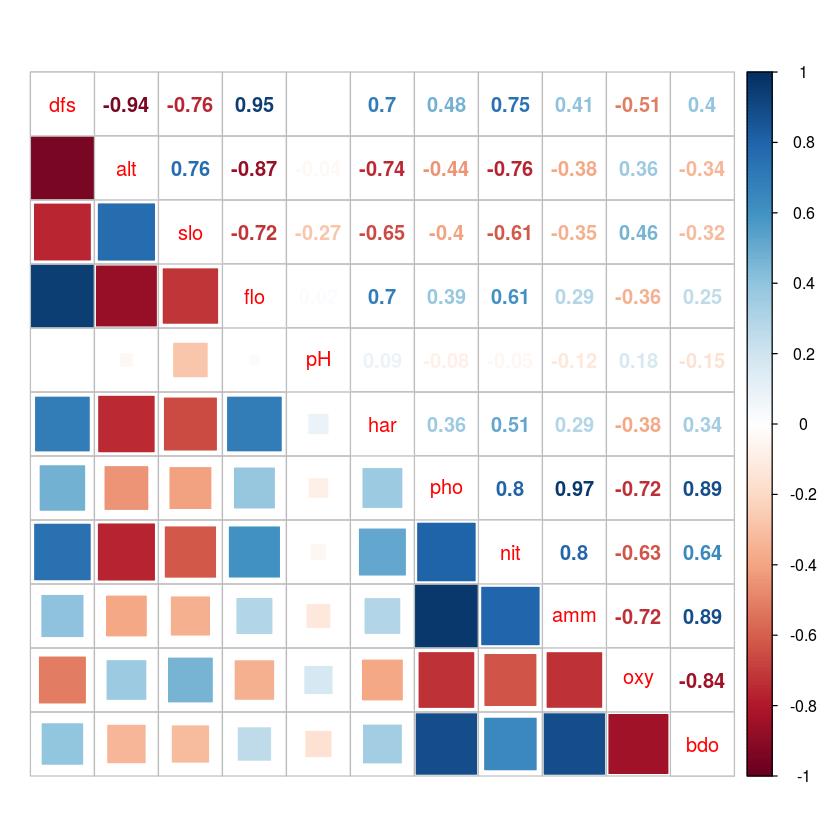


Call:
rda(X = env, scale = TRUE) 

Partitioning of correlations:
              Inertia Proportion
Total              11          1
Unconstrained      11          1

Eigenvalues, and their contribution to the correlations 

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6     PC7
Eigenvalue            6.3216 2.2316 1.00420 0.50068 0.37518 0.24797 0.16647
Proportion Explained  0.5747 0.2029 0.09129 0.04552 0.03411 0.02254 0.01513
Cumulative Proportion 0.5747 0.7776 0.86886 0.91437 0.94848 0.97102 0.98616
                          PC8     PC9    PC10     PC11
Eigenvalue            0.10716 0.02354 0.01726 0.004314
Proportion Explained  0.00974 0.00214 0.00157 0.000390
Cumulative Proportion 0.99590 0.99804 0.99961 1.000000

Scaling 2 for species and site scores
* Species are scaled proportional to eigenvalues
* Sites are unscaled: weighted dispersion equal on all dimensions
* General scaling constant of scores:  4.226177 


Species scores

     

Call: rda(X = env, scale = TRUE)

              Inertia Rank
Total              11     
Unconstrained      11   11
Inertia is correlations 

Eigenvalues for unconstrained axes:
  PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11 
6.322 2.232 1.004 0.501 0.375 0.248 0.166 0.107 0.024 0.017 0.004 



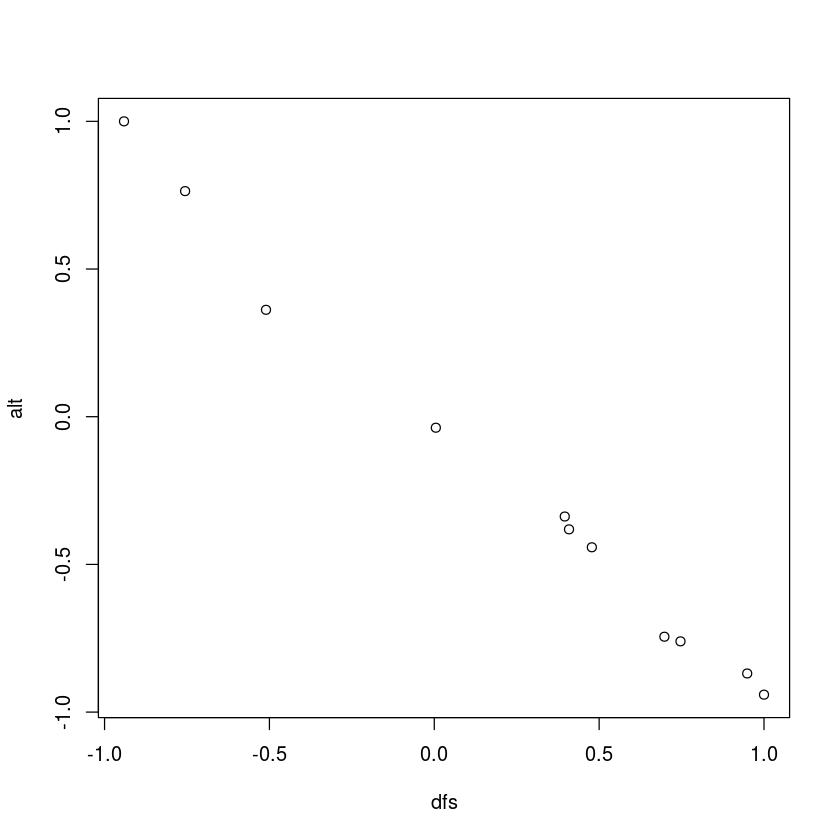

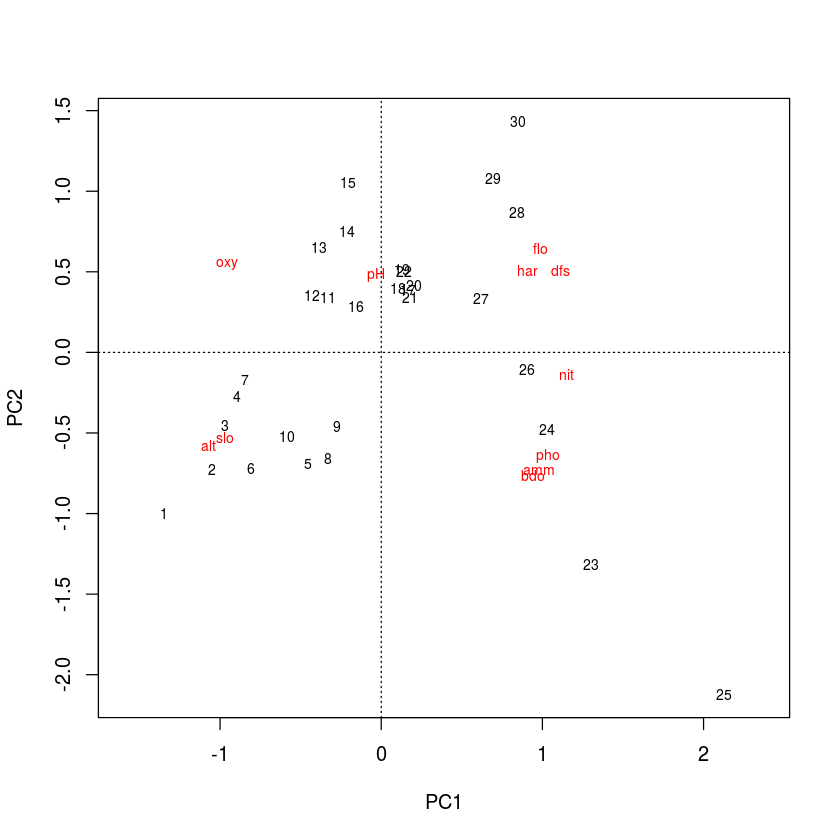

In [7]:
# PCA on full dataset
# Use correlation matrix; scale = TRUE – standardization of variables
plot(corrplot.mixed(cor(env), lower='square', upper='number'))
env.pca = rda(env, scale=TRUE)
summary(env.pca)
print(env.pca)
plot(env.pca)

# Cluster Analysis in combination with Principal Components Analysis Example

In [4]:
# Load Data
library(ade4)

data(doubs)

env = doubs$env
spe = doubs$fish

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


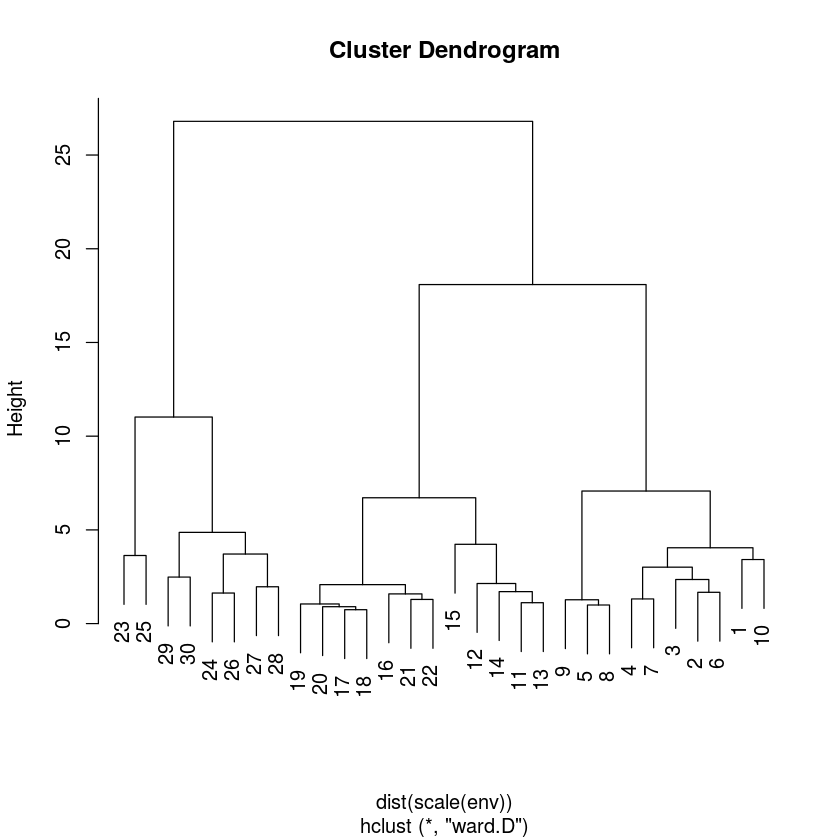

In [5]:
# Cluster Analysis

# Here, we will cluster the sites using environmental data. We will first standardize the
# environmental variables, calculate the Euclidean distance, followed by ward clustering.
env.w = hclust(dist(scale(env)), "ward")
plot(env.w)

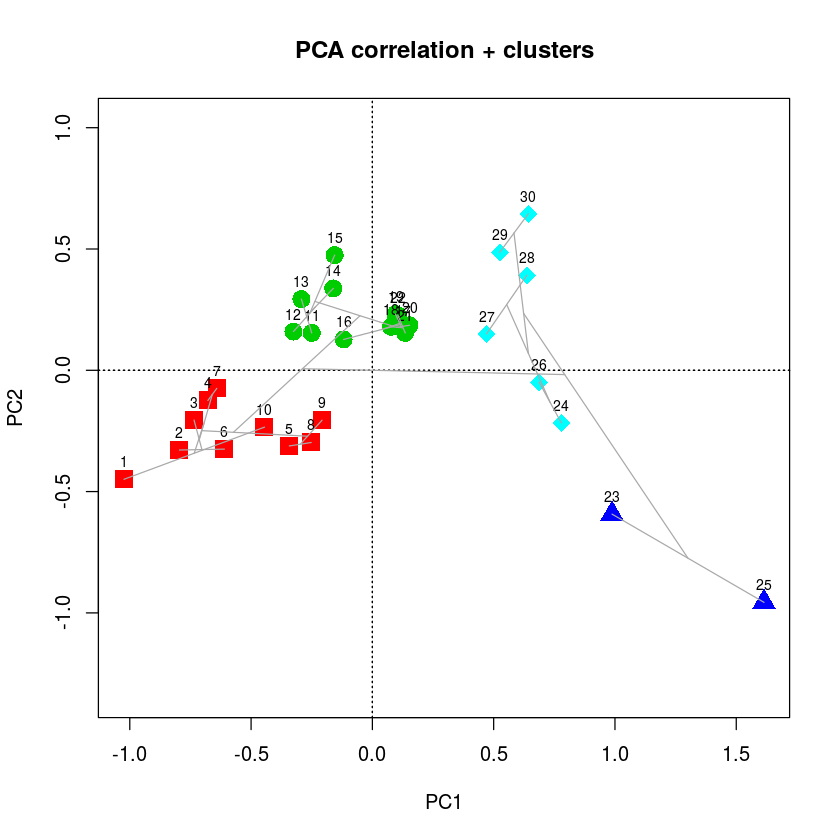

In [6]:
# Combine the Cluster Analysis with Principal Components Analysis

#A. Cut the dendrograms to get 4 groups
gr = cutree(env.w, k=4)
grl = levels(factor(gr))

#B. Get the site scores, scaling 1
site.sc1 = scores(env.pca, display="wa", scaling=1)

#C. Plot the sites with cluster symbols and colours
p = plot(env.pca, display="wa", scaling=1, type = "n", main = "PCA correlation + clusters")
abline(v=0, lty="dotted")
abline(h=0, lty="dotted")
for (i in 1: length(grl)) {
    points (site.sc1[gr==i,], pch=(14+i), cex=2, col=i+1)
}
text(site.sc1, row.names(env), cex=.7, pos=3)

#D. Add the dendrogram
ordicluster(p, env.w, col="dark grey")